In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

In [2]:
df = pd.read_csv('train.csv',parse_dates=True)
df2 = df.copy()
test = pd.read_csv('test.csv')
test2 = test.copy()
sub = pd.read_csv('submission.csv')

In [3]:
df2 = pd.read_csv('train.csv',parse_dates=True)
sub = pd.read_csv('submission.csv')

In [4]:
df2.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
 10  Cylinders         19237 non-null  int64 
 11  Gear box type     19237 non-null  object
 12  Drive wheels      19237 non-null  object
 13  Doors             19237 non-null  object
 14  Wheel             19237 non-null  object
 15  Color             19237 non-null  object
 16  Airbags           19237 non-null  int64 
 17  Price       

In [6]:
df2['Doors'].value_counts()

4-May    18332
2-Mar      777
>5         128
Name: Doors, dtype: int64

In [7]:
df2.groupby('Levy').mean().sort_values('Price',ascending=False)

,ID,Prod. year,Cylinders,Airbags,Price
Levy,,,,,
2067,45704136.5,2019.0,8.0,6.0,449958.5
2269,45760644.0,2018.0,8.0,0.0,288521.0
2819,45813777.0,2016.0,8.0,12.0,175622.0
1951,45806776.0,2015.0,8.0,14.0,128188.5
3057,45773951.0,2019.0,12.0,12.0,121524.0
...,...,...,...,...,...
2472,45773126.0,2003.0,6.0,12.0,314.0
1297,45771563.0,2011.0,6.0,12.0,314.0
1279,45812580.0,2003.0,4.0,11.0,150.0


In [8]:
test2[(test2['Manufacturer'] == 'OPEL') & (test2['Prod. year']<=1999)]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,4-May,Left wheel,Black,0
78,45793325,-,OPEL,Vectra,1999,Hatchback,No,CNG,1.8,30000 km,4,Manual,Front,4-May,Left wheel,Silver,4
109,45801493,-,OPEL,Astra,1992,Hatchback,No,CNG,1.6,10000 km,4,Manual,Front,4-May,Left wheel,Carnelian red,0
327,45785886,-,OPEL,Corsa,1997,Hatchback,No,Petrol,1.4,220000 km,4,Manual,Front,4-May,Left wheel,Carnelian red,2
349,45770466,-,OPEL,Astra,1997,Sedan,No,Petrol,1.6,0 km,4,Automatic,Front,4-May,Left wheel,Red,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,45798317,-,OPEL,Vectra,1999,Sedan,No,Petrol,1.8,222222 km,4,Manual,Front,4-May,Left wheel,Sky blue,4
7733,45808778,-,OPEL,Vectra,1992,Sedan,No,CNG,2,25000 km,4,Manual,Front,4-May,Left wheel,Grey,2
7980,45794535,-,OPEL,Astra,1996,Coupe,No,Petrol,2,999 km,4,Manual,Front,2-Mar,Left wheel,Green,2
8084,45789587,-,OPEL,Vectra,1997,Sedan,No,Petrol,1.6,250000 km,4,Manual,Front,>5,Left wheel,Beige,0


In [9]:
df2.groupby('Cylinders').mean().sort_values('Price',ascending=False)

,ID,Prod. year,Airbags,Price
Cylinders,,,,
12,4.519357e+07,2011.184211,10.368421,39757.131579
10,4.432546e+07,2008.416667,10.833333,31486.666667
8,4.545564e+07,2010.040363,6.349142,28198.847629
4,4.560082e+07,2011.377810,6.058607,18436.320874
16,4.577747e+07,2007.000000,8.800000,17519.800000
6,4.553892e+07,2009.558348,8.894281,16618.038417
1,4.533292e+07,2005.236842,3.263158,16375.105263
14,4.579753e+07,2009.000000,8.000000,15681.000000
5,4.549286e+07,2007.710059,6.940828,14640.213018


In [10]:
def cylinder_mean(s):
    if s == 12:
        s = 39757
    elif s == 10:
        s = 31486
    elif s == 8:
        s = 28198
    elif s == 4:
        s = 18436
    elif s == 16:
        s = 17519
    elif s == 6:
        s = 16618
    elif s == 1:
        s = 16375
    elif s == 14:
        s = 15681
    elif s == 5:
        s = 14640
    elif s == 2:
        s = 10358
    elif s == 3:
        s = 9879
    elif s == 7:
        s = 6446
    else:
        s = 2800
        
    return int(s)

In [11]:
# df['Cylinder_mean'] = df['Cylinders'].apply(cylinder_mean)

# test['Cylinder_mean'] = test['Cylinders'].apply(cylinder_mean)

In [12]:
def gear_box_mean(s):
    if s == 'Tiptronic':
        s = 26448
    elif s == 'Manual':
        s = 25614
    elif s == 'Automatic':
        s = 15974
    else:
        s = 14762
    return int(s)

In [13]:
# df['Gear box type_mean'] = df['Gear box type'].apply(gear_box_mean)

# test['Gear box type_mean'] = test['Gear box type'].apply(gear_box_mean)

In [14]:
def color_mean(s):
    if s == 'Blue':
        s = 33726
    elif s == 'Yellow':
        s = 20666
    elif s == 'Brown':
        s = 19709
    elif s == 'Grey':
        s = 19203
    elif s == 'Black':
        s = 18886
    elif s == 'White':
        s = 18204
    elif s == 'Carnelian red':
        s = 15820
    elif s == 'Beige':
        s = 15627
    elif s == 'Silver':
        s = 15091
    elif s == 'Golden':
        s = 14678
    elif s == 'Sky blue':
        s = 14079
    elif s == 'Red':
        s = 13553
    elif s == 'Orange':
        s = 13008
    elif s == 'Pink':
        s = 10649
    elif s == 'Green':
        s = 9449
    else:
        s = 8837
        
    return int(s)

In [15]:
# df['Color_mean'] = df['Color'].apply(color_mean)

# test['Color_mean'] = test['Color'].apply(color_mean)

In [16]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4,5331


In [17]:
def category_mean(s):
    if s == 'Goods wagon':
        s = 122916
    elif s == 'Pickup':
        s = 28805
    elif s == 'Universal':
        s = 25253
    elif s == 'Cabriolet':
        s = 24583
    elif s == 'Jeep':
        s = 23684
    elif s == 'Coupe':
        s = 21250
    elif s == 'Minivan':
        s = 20531
    elif s == 'Microbus':
        s = 18550
    elif s == 'Sedan':
        s = 14231
    elif s == 'Limousine':
        s = 11534
    else:
        s = 11381
        
    return int(s)

In [18]:
# df['Category_mean'] = df['Category'].apply(category_mean)

# test['Category_mean'] = test['Category'].apply(category_mean)

In [19]:
def doors_mean(s):
    if s == '2-Mar':
        s = 50379
    elif s == '>5':
        s = 22299
    else:
        s = 17180
    return int(s)

In [20]:
# df['Doors_mean'] = df['Doors'].apply(doors_mean)

# test['Doors_mean'] = test['Doors'].apply(doors_mean)

In [21]:
# df['Wheel_mean'] = df['Wheel'].apply(lambda x: 19363 if x == 'Left wheel' else 8900)

# test['Wheel_mean'] = test['Wheel'].apply(lambda x: 19363 if x == 'Left wheel' else 8900)

In [22]:
df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4,5331


In [23]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4,26108
19235,45793526,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4,5331


In [24]:
df2.groupby(['Prod. year', 'Cylinders']).mean().sort_values('Price',ascending=False)

ID    Airbags          Price
Prod. year Cylinders                                        
2020       8          4.579552e+07  12.000000  627220.000000
1999       4          4.567959e+07   3.414966  186062.530612
2017       1          4.458755e+07   0.000000  147397.000000
2019       8          4.541621e+07  10.300000  140659.100000
           12         4.577395e+07  12.000000  121524.000000
...                            ...        ...            ...
1947       6          3.816900e+07   0.000000     150.000000
2009       2          4.576165e+07   2.000000      60.000000
2007       7          4.574188e+07   9.000000      40.000000
2011       7          4.537004e+07  12.000000      30.000000
2020       12         4.581498e+07   0.000000       3.000000

[239 rows x 3 columns]

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0


In [26]:
df2['Fuel type'].value_counts()

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

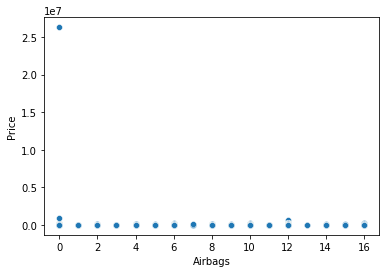

In [27]:
sns.scatterplot(data=df,x='Airbags',y='Price')

In [28]:
index = df[df['Price'] > 600000].index

In [29]:
index

Int64Index([1225, 8541, 16983], dtype='int64')

In [30]:
df.drop(index=index, axis=1,inplace=True)

In [31]:
df.isnull().sum()

ID                  0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Price               0
dtype: int64

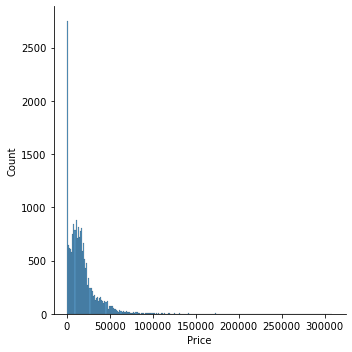

In [32]:
sns.displot(df['Price'])

In [33]:
from scipy import stats

In [34]:
box = stats.boxcox(df['Price'])

<AxesSubplot:ylabel='Count'>

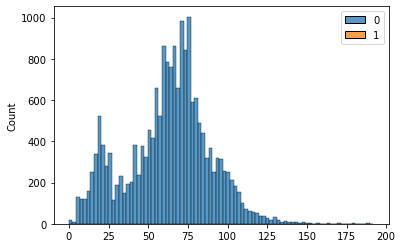

In [35]:
sns.histplot(box)

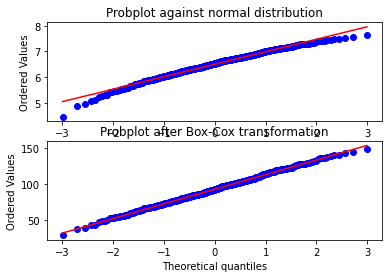

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

# We now use `boxcox` to transform the data so it's closest to normal:

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

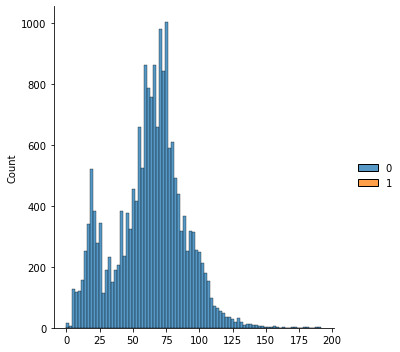

In [37]:
sns.displot(box)

In [38]:
df2[df2['Price']>22075]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
5,45802912,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4,Automatic,Front,4-May,Left wheel,White,4,39493
9,45756839,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6,Automatic,4x4,4-May,Left wheel,Silver,12,26657
14,45732604,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,76000 km,4,Automatic,Front,4-May,Left wheel,White,4,59464
17,45797221,810,HYUNDAI,Elantra,2016,Sedan,Yes,Petrol,1.8,54317 km,4,Automatic,Front,4-May,Left wheel,White,4,28382
34,45542380,-,JEEP,Grand Cherokee,2007,Jeep,Yes,Diesel,3.0 Turbo,250000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,10,24462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,45802856,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,121902 km,4,Automatic,Front,4-May,Left wheel,Black,4,50037
19216,45784464,1249,TOYOTA,RAV 4,2017,Jeep,Yes,Petrol,2.5,23430 km,4,Tiptronic,Front,4-May,Left wheel,Beige,12,37633
19217,45804344,1624,LEXUS,ES 300,2009,Sedan,Yes,Petrol,3.5,132700 km,4,Automatic,Front,4-May,Left wheel,White,4,26017
19227,45769427,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6,Automatic,4x4,4-May,Left wheel,Black,12,29793


In [39]:
log = np.log1p(df2['Price'])
log.skew()

-1.3757413681328308

In [40]:
log = np.log(df2['Price'])
log.skew()

-1.391557339534271

In [41]:
log = np.sqrt(np.sqrt(df2['Price']))
log.skew()

-0.007600931322003111

<AxesSubplot:xlabel='Price', ylabel='Count'>

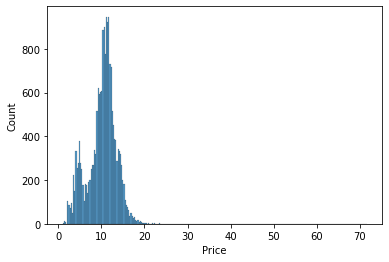

In [42]:
sns.histplot(np.sqrt(np.sqrt(df2['Price'])))

In [43]:
sample = df2['Price']

In [44]:
sample.describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [45]:
IQR = 22075-5331
lower_limit = 1.5*IQR - 5331
upper_limit = 22075 - 1.5*IQR

In [46]:
lower_limit

19785.0

In [47]:
upper_limit

-3041.0

In [48]:
np.percentile(sample,[75,25])

array([22075.,  5331.])

In [49]:
df2.corr()['Price'].sort_values()

Airbags      -0.012824
ID           -0.000844
Cylinders     0.007518
Prod. year    0.012982
Price         1.000000
Name: Price, dtype: float64

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

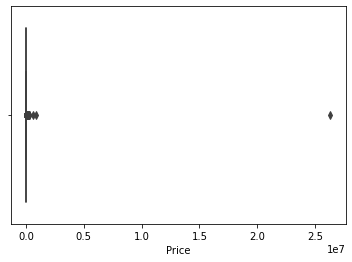

In [50]:
sns.boxplot(sample)

C:\Users\akumar5\AppData\Local\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

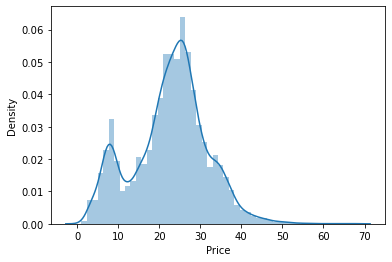

In [51]:
sns.distplot(np.cbrt(df['Price']))

<AxesSubplot:>

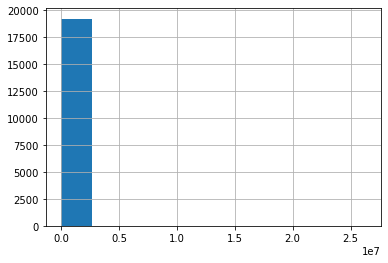

In [52]:
df2['Price'].hist()

In [53]:
df['Model'].value_counts()

Prius                 1083
Sonata                1079
Camry                  938
Elantra                922
E 350                  542
                      ... 
Explorer XLT             1
CX-5 Touring             1
RIO lx                   1
Highlander limited       1
Fusion 2015              1
Name: Model, Length: 1588, dtype: int64

In [54]:
# df['Model1'] = df['Model'].replace(regex=True, to_replace=r'', value=r'')

In [55]:
# df['Model1'] = df['Model'].str.split()[:-1]

In [56]:
# a = df['Model1'].iloc[305].split()[:-1]

In [57]:
# ''.join(a)

In [58]:
df['Price'].value_counts()

15681    280
470      274
14113    244
392      242
314      235
        ... 
14686      1
12639      1
18800      1
16753      1
16408      1
Name: Price, Length: 2312, dtype: int64

In [59]:
index2 = df[df['Price'] <10].index

In [60]:
index2

Int64Index([  221,   476,   753,  1164,  4776,  4958,  5344,  5890,  7276,
             7359,  7815,  8454,  8993,  9730, 10885, 11636, 12917, 13419,
            14492, 14642, 15347, 16992, 17596, 18575],
           dtype='int64')

In [61]:
df.drop(index=index2,axis=1,inplace=True)

In [62]:
df.drop('ID', axis=1, inplace=True)

test.drop('ID', axis=1, inplace=True)

In [63]:
df['Levy'] = df['Levy'].replace('-', 0)

test['Levy'] = test['Levy'].replace('-', 0)

In [64]:
df['Levy'] = df['Levy'].apply(lambda x: int(x))

test['Levy'] = test['Levy'].apply(lambda x: int(x))

In [65]:
df['Levy'].describe()

count    19210.000000
mean       632.915877
std        567.668348
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64

In [66]:
def levy(num):
    if num ==0:
        num = 632
    else:
        pass
    return num

In [67]:
# df['Levy'] = df['Levy'].apply(levy)

# test['Levy'] = test['Levy'].apply(levy)

In [68]:
df.corr()['Price']

Levy          0.039905
Prod. year    0.286397
Cylinders     0.103148
Airbags      -0.018314
Price         1.000000
Name: Price, dtype: float64

In [69]:
def turbo_engine(text):
    if re.findall(r'\d{1,}.\d{1,} Turbo', text):
        text = 5
    else:
        text = 0
    return text

In [70]:
df['Turbo'] = df['Engine volume'].apply(turbo_engine)

test['Turbo'] = test['Engine volume'].apply(turbo_engine)

In [71]:
def engine_volume(text):
    if re.findall(r'\d{1,}.\d{1,} Turbo', text):
        text = text.replace('Turbo',  '')
    else:
        pass
    return float(text)

In [72]:
df['Engine volume'] = df['Engine volume'].apply(engine_volume)

test['Engine volume'] = test['Engine volume'].apply(engine_volume)

In [73]:
def mileage(text):
    if re.findall(r'\d{1,} km', text):
        text = text.replace(' km',  '')
    else:
        None
    return int(text)

In [74]:
df['Mileage'] = df['Mileage'].apply(mileage)

test['Mileage'] = test['Mileage'].apply(mileage)

In [75]:
def doors(text):
    if text == '>5':
        text = 22475
    elif text == '2-Mar':
        text = 16585
    else:
        text = 17120
    return int(text)
    

In [76]:
df['No. of doors'] = df['Doors'].apply(doors)

test['No. of doors'] = test['Doors'].apply(doors)

In [77]:
df.groupby('Fuel type').mean().sort_values('Price',ascending=False)

,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Price,Turbo,No. of doors
Fuel type,,,,,,,,,
Diesel,746.407536,2010.964056,2.386118,7.119253e+05,4.539167,5.424145,24124.814328,1.062221,17142.325235
Plug-in Hybrid,215.697674,2013.093023,1.654651,1.219321e+05,4.093023,9.209302,23700.453488,0.174419,17120.000000
Hydrogen,0.000000,2012.000000,2.400000,1.168000e+05,6.000000,8.000000,20385.000000,0.000000,17120.000000
Petrol,645.365225,2010.859992,2.361700,1.133099e+06,4.717812,6.857326,17266.970873,0.500099,17125.472946
LPG,587.946128,2012.007856,2.234456,2.722804e+05,4.344557,4.639731,13324.372615,0.067340,17151.857464
Hybrid,567.781381,2012.183953,2.079815,4.718248e+05,4.272854,7.783338,10852.351132,0.036343,17132.426614
CNG,76.436105,2000.081136,2.481542,2.238497e+07,4.920892,4.780933,8526.839757,0.152130,17216.693712


In [78]:
test2['Levy']

0          -
1          -
2          -
3        975
4          -
        ... 
8240    1357
8241       -
8242    1646
8243     784
8244     448
Name: Levy, Length: 8245, dtype: object

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19210 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              19210 non-null  int64  
 1   Manufacturer      19210 non-null  object 
 2   Model             19210 non-null  object 
 3   Prod. year        19210 non-null  int64  
 4   Category          19210 non-null  object 
 5   Leather interior  19210 non-null  object 
 6   Fuel type         19210 non-null  object 
 7   Engine volume     19210 non-null  float64
 8   Mileage           19210 non-null  int64  
 9   Cylinders         19210 non-null  int64  
 10  Gear box type     19210 non-null  object 
 11  Drive wheels      19210 non-null  object 
 12  Doors             19210 non-null  object 
 13  Wheel             19210 non-null  object 
 14  Color             19210 non-null  object 
 15  Airbags           19210 non-null  int64  
 16  Price             19210 non-null  int64 

In [80]:
# df['Leather'] = df['Leather interior'].apply(lambda x: 5 if x == 'Yes' else -1)

# test['Leather'] = test['Leather interior'].apply(lambda x: 5 if x == 'Yes' else -1)

In [81]:
# df.drop('Leather interior',axis=1,inplace=True)

# test.drop('Leather interior',axis=1,inplace=True)

In [82]:
# df.drop('Doors', axis=1, inplace=True)

# test.drop('Doors', axis=1, inplace=True)

In [83]:
# df.drop('Manufacturer', axis=1, inplace=True)

# test.drop('Manufacturer', axis=1, inplace=True)

In [84]:
# df.drop('Model', axis=1, inplace=True)

# test.drop('Model', axis=1, inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19210 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              19210 non-null  int64  
 1   Manufacturer      19210 non-null  object 
 2   Model             19210 non-null  object 
 3   Prod. year        19210 non-null  int64  
 4   Category          19210 non-null  object 
 5   Leather interior  19210 non-null  object 
 6   Fuel type         19210 non-null  object 
 7   Engine volume     19210 non-null  float64
 8   Mileage           19210 non-null  int64  
 9   Cylinders         19210 non-null  int64  
 10  Gear box type     19210 non-null  object 
 11  Drive wheels      19210 non-null  object 
 12  Doors             19210 non-null  object 
 13  Wheel             19210 non-null  object 
 14  Color             19210 non-null  object 
 15  Airbags           19210 non-null  int64  
 16  Price             19210 non-null  int64 

In [86]:
price = df['Price']
df = df.drop('Price',axis=1)
df['label'] = 1
test['label'] = 2

concat_df_test = pd.concat([df , test])
df_objects = concat_df_test.select_dtypes(include='object')
df_numeric = concat_df_test.select_dtypes(exclude='object')

# Create your dummies
df_obj_dummies = pd.get_dummies(df_objects, drop_first=True)
features_df = pd.concat([df_obj_dummies, df_numeric], axis=1)

# Split your data
df = features_df[features_df['label'] == 1]
test = features_df[features_df['label'] == 2]

# Drop your labels
df = df.drop('label', axis=1)
df = pd.concat([df,price],axis=1)
test = test.drop('label', axis=1)

In [87]:
lst1 = [x for x in df.columns.tolist() if 'Model_' in x]
        
lst2 = ['Model'+str(x) for x in range(len(lst1))]

d = dict(zip(lst1, lst2))

df.rename(columns=d, inplace=True)
test.rename(columns=d, inplace=True)

In [218]:
# df_uint = df.select_dtypes(include='uint8')
# df_int64 = df.select_dtypes(include='int64')
# df_int64 = df_int64.astype(np.int16)
# df = pd.concat([df_int64, df_uint], axis=1)

# test_uint = test.select_dtypes(include='uint8')
# test_int64 = test.select_dtypes(include='int64')
# test_int64 = test_int64.astype(np.int16)
# test = pd.concat([test_int64, test_uint], axis=1)

In [219]:
X = df.drop('Price',axis=1)
y = df['Price']

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [222]:
from sklearn.preprocessing import MinMaxScaler

In [223]:
scaler = MinMaxScaler()

In [224]:
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# test = scaler.transform(test)

In [225]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [226]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model Training
    log_y_train = np.log1p(y_train)
    model.fit(X_train, log_y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
#     preds = abs(preds)

    rmsle = np.sqrt(mean_squared_log_error(y_test, np.expm1(preds)))
    print(f'RMSLE: {rmsle}')

In [227]:
model = lgb.LGBMRegressor()

run_model(model, X_train, y_train, X_test, y_test)

RMSLE: 0.9898465331538205


In [228]:
model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=760, max_depth=-1, learning_rate=0.11, num_leaves=31)

run_model(model, X_train, y_train, X_test, y_test)

RMSLE: 0.929926639771278


In [229]:
# model = lgb.LGBMRegressor(n_estimators=10000, num_leaves=70, max_depth=20,min_child_samples=10, 
#                           learning_rate=0.01, colsample_bytree=0.8,subsample=0.5, reg_alpha=0, reg_lambda=20)

# run_model(model, X_train, y_train, X_test, y_test)

In [230]:
# model = lgb.LGBMRegressor(boosting_type='gbdt', n_estimators=760, max_depth=-1, learning_rate=0.11, num_leaves=31)
# model = RandomForestRegressor(n_estimators=500, max_features=500)
# model = lgb.LGBMRegressor(n_estimators=10000, num_leaves=70, max_depth=20,min_child_samples=10, 
#                           learning_rate=0.01, colsample_bytree=0.8,subsample=0.5, reg_alpha=0, reg_lambda=20)
# model = xgb.XGBRegressor(n_estimators=1000, max_depth=12, learning_rate=0.05, colsample_bytree=0.45)

y_ = np.log1p(y)
model.fit(X, y_)
predictions = pd.DataFrame(np.expm1(model.predict(test)), columns=['Price'])
predictions.to_csv('predictions.csv',index=False)

In [231]:
# param_grid = {'boosting_type': ['gbdt','dart','goss','rf'], 'num_leaves':[31, 40, 50, 75, 100],
#              'max_depth':[-1,1,10], 'learning_rate':[0.001,0.01,0.05,0.1,0.3,0.5,1],
#              'n_estimators':[100,500,1000,2000,3000,5000,10000]}

In [232]:
# model = RandomForestRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [233]:
# model = RandomForestRegressor(n_estimators=500, max_features=500)

# run_model(model, X_train, y_train, X_test, y_test)

In [234]:
# model = AdaBoostRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [235]:
# model = GradientBoostingRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [236]:
# model = CatBoostRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [237]:
# model = CatBoostRegressor(n_estimators=2000, learning_rate=0.05, max_depth=9, rsm=0.5)

# run_model(model, X_train, y_train, X_test, y_test)

In [238]:
# model = xgb.XGBRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [239]:
# model = xgb.XGBRegressor(n_estimators=1000, max_depth=12, learning_rate=0.05, colsample_bytree=0.45)

# run_model(model, X_train, y_train, X_test, y_test)

In [240]:
# model = xgb.XGBRFRegressor()

# run_model(model, X_train, y_train, X_test, y_test)

In [241]:
# !pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

In [242]:
# pip install mljar-supervised

In [243]:
# from supervised.automl import AutoML

In [244]:
# !pip install autoviml

In [88]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.682. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.46.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [91]:
df['Price'] = np.log1p(df['Price'])

In [ ]:
target = 'Price'
model, features, trainm, testm = Auto_ViML(
    df,
    target,
    test,
    sub,
    hyper_param="RS",
    feature_reduction=False,
    scoring_parameter= "neg_mean_squared_log_error",
    KMeans_Featurizer=True,
    Boosting_Flag= False,
    Binning_Flag=False,
    Add_Poly=1,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=2
)

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (19210, 2093)
    Training Set Memory Usage = 39.64 MB
Test Set Shape = (8245, 2092)
    Test Set Memory Usage = 16.95 MB
Single_Label Target: ['Price']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 19210 rows, 2092 cols
Too many columns to print
    Numeric Columns: ['Engine volume']
    Integer-Categorical Columns: ['Levy', 'Mileage', 'Cylinders', 'Airbags', 'No. of doors']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['Manufacturer_ALFA ROMEO', 'Manufacturer_ASTON MARTIN', 'Manufa

    CV RMSE Score : 0.1771 +/- 0.001843 | Min = 0.1753 | Max = 0.1802
    Time Taken: 3 (in seconds)
Initially adding 2 variable(s) due to Add_Poly = 1 setting
    Added variables: ['Cylinders Airbags', 'Engine volume Airbags']
    Intxn and Poly Vars are: ['Cylinders Airbags', 'Engine volume Airbags']
Processing Prod. year column for date time features....
    Adding 1 columns from date-time column Prod. year in train
        Adding time series features for test data...
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  15368 , CV rows =  3842
    Binning_Flag set to False or there are no float vars in data set to be binned
    Adding one Feature named Price_KMeans_Clusters based on KMeans_Featurizer_Flag=True...
    Used KMeans to naturally cluster Train predictor variables into 4 clusters
Performing MinMax scaling of train and validation data
############### Forests M O D E L   B U I L D I